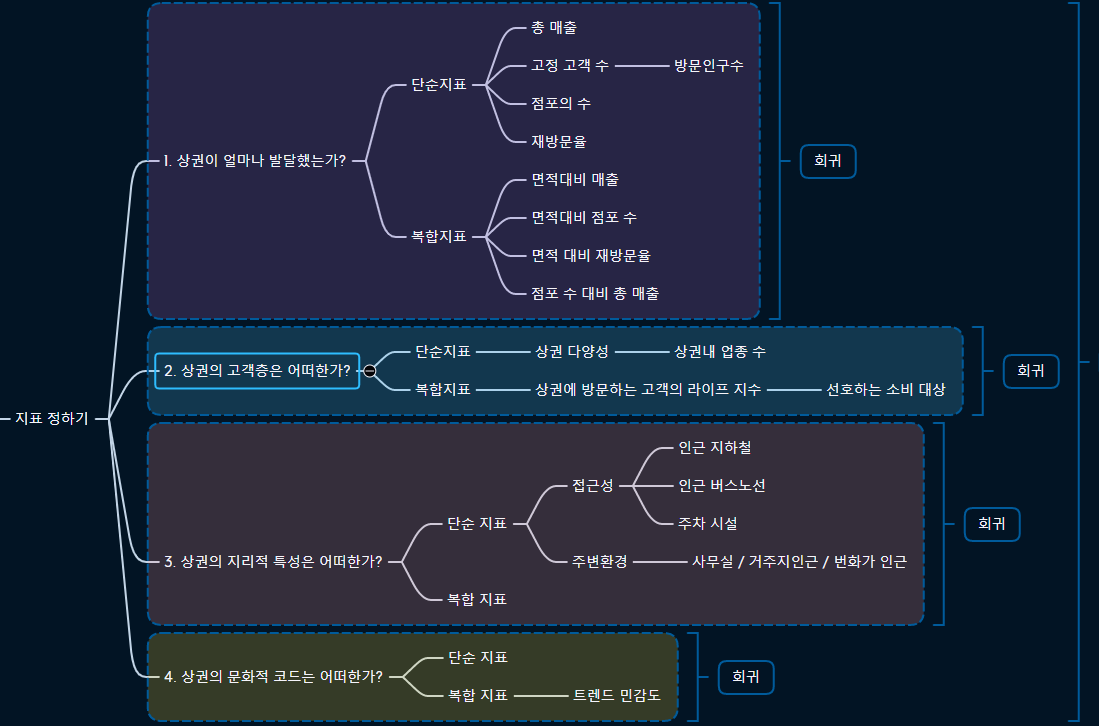

# 기본 로드

###### 라이브러리 로드

In [1]:
# 기초 전처리
import numpy as np
import pandas as pd
import geopandas as gpd
from math import log as ln

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('max_columns', 200) # 최대 컬럼 갯수 지정
pd.set_option('max_rows', 200) # 최대 로우 갯수 지정
pd.set_option('display.width', 10000)

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 사용을 위해서 세팅

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action='ignore')

##### 필요 함수 로드

In [2]:
def load_data(data):
    
    ### 데이터를 로드하여 전처리하는 함수 ###
    df = pd.read_csv(data, encoding='cp949')
    df = df[df['상권_구분_코드']=='A']
    df['상권_코드'] = df['상권_코드'].astype('str')
    df['cat서비스_업종_코드_명'] = df['서비스_업종_코드_명'].apply(categorization)
    
    if '_2020.csv' in data:
        # 2020년 3분기, 2020년 4분기, 2021년 1분기, 2021년 2분기 데이터만 추출하기 위한 조건 생성
        기준년_2020_3분기= ((df['기준_년_코드']==2020) & (df['기준_분기_코드']==3)) 
        기준년_2020_4분기= ((df['기준_년_코드']==2020) & (df['기준_분기_코드']==4)) 
        # 전체 테이블에 boolean 인덱싱
        df = df[ 기준년_2020_3분기 | 기준년_2020_4분기 ]
        return df
    else:
        기준년_2021_1분기= ((df['기준_년_코드']==2021) & (df['기준_분기_코드']==1)) 
        기준년_2021_2분기= ((df['기준_년_코드']==2021) & (df['기준_분기_코드']==2))
        
        df = df[ 기준년_2021_1분기 | 기준년_2021_2분기 ]
        return df

def categorization(x):
    if x == '청과상' or x == '수산물판매' or x == '육류판매' or x == '미곡판매' or x == '반찬가게' or \
       x == '치과의원' or x == '의료기기' or x == '의약품' or x == '한의원' or x == '일반의원' or \
       x == '편의점' or x == '슈퍼마켓' or x == '세탁소' or x == '제과점':
        return '생활 필수'
    
    elif x == '미용재료' or x == '화장품' or x == '피부관리실' or x == '네일숍' or x == '미용실' or \
         x == '한복점' or x ==  '섬유제품' or x ==  '유아의류' or x == '안경' or x == '신발' or \
         x == '가방' or x == '의류임대' or x == '일반의류':
        return '미용/의류'
    
    elif x == '노래방' or x == '전자게임장' or x == 'PC방' or x == '골프연습장' or x == '당구장' or \
         x == 'DVD방' or x == '기타오락장' or x == '볼링장' or x == '스포츠클럽' or x == '스포츠 강습' or \
         x == '게스트하우스' or x == '여행사' or x == '서적':
        return '여가'
    
    elif x == '분식전문점' or x == '커피-음료' or x == '호프-간이주점' or x == '일식음식점' or \
         x == '중식음식점' or x == '한식음식점' or x == '양식음식점' or x == '패스트푸드점' or x == '치킨전문점':
        return '외식'
    
    elif x == '세무사사무소' or x == '법무사사무소' or x == '기타법무서비스' or x == '변리사사무소' or x == '회계사사무소' or \
         x == '변호사사무소' or x == '부동산중개업' or x == '독서실' or x == '문구' or x == '컴퓨터학원' or x == '고시원' or \
         x == '예술학원' or x == '외국어학원' or x == '일반교습학원' or x == '가전제품' or x == '핸드폰' or x == '통신기기수리' or \
         x == '컴퓨터및주변장치판매' or x == '가전제품수리' or x == '자동차미용' or x == '자동차수리' or x == '중고차판매' or \
         x == '자전거 및 기타운송장비' or x == '모터사이클수리'  or x == '주류도매':
        return '편의시설'
    
    else:
        return '기타'

##### 데이터 로드

In [3]:
store_2021 = load_data('서울시 우리마을가게 상권분석서비스(상권-추정매출).csv') 
store_2020 = load_data('서울시 우리마을가게상권분석서비스(상권-추정매출)_2020.csv') 

store_2021.head(2)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,cat서비스_업종_코드_명
11650,2021,2,A,골목상권,1001010,풍성로37가길,CS300043,전자상거래업,1177203,58,100,0,47,48,0,5,0,0,0,0,0,22,24,54,0,55,45,0,0,7,93,0,0,1177203,0,555555,560345,0,61303,0,0,0,0,0,252874,287356,636973,0,651341,525862,0,0,81418,1095785,0,0,58,0,19,29,0,10,0,0,0,0,0,19,10,29,0,19,39,0,0,10,48,0,0,5,기타
11651,2021,2,A,골목상권,1001010,풍성로37가길,CS300033,철물점,7277987,878,81,19,31,5,26,10,9,7,12,0,34,23,35,9,0,78,22,0,8,7,19,27,39,5916005,1361982,2242880,390067,1901572,715122,666364,487583,874399,0,2486673,1657782,2515928,617604,0,3523599,991419,0,357561,292550,861397,1235210,1768301,714,164,257,65,131,130,131,66,98,0,228,228,260,162,0,520,196,0,98,33,163,196,228,2,기타


In [4]:
bs_area = gpd.read_file('상권_geometry_좌표.geojson', driver= 'GeoJSON')
bs_area= bs_area[bs_area['TRDAR_SE_C'] == 'A']
df_base = bs_area[['TRDAR_CD','TRDAR_SE_1']].sort_values('TRDAR_CD').reset_index(drop=True)
df_base.columns = ['상권_코드', '상권_이름']
df_base.drop(['상권_이름'], axis=1, inplace=True)
df_base.to_csv('base_df.csv', index=False)
df_base.head()

,상권_코드
0,1000001
1,1000002
2,1000003
3,1000004
4,1000005


# 매출 데이터 전처리
## 카테고리컬 테이블 생성

In [5]:
# 총액이 있는 컬럼에 비율과 건수를 지우고 
# 필요없는 컬럼 또한 지우는 함수
def drop_columns(df):
    df_copy = df.copy()

    for col in df_copy.columns:
        if '_비율' in col:
            df_copy.drop(col, axis=1, inplace=True)
        elif '_건수' in col:
            df_copy.drop(col, axis=1, inplace=True)
        elif col == '상권_구분_코드':
            df_copy.drop(col, axis=1, inplace=True)
        elif col == '상권_코드_명':
            df_copy.drop(col, axis=1, inplace=True)
        elif col == '점포수':
            df_copy.drop(col, axis=1, inplace=True)
        elif col == '상권_구분_코드_명':
            df_copy.drop(col, axis=1, inplace=True)
        elif col == '기준_년_코드':
            df_copy.drop(col, axis=1, inplace=True)
        elif col == '기준_분기_코드':
            df_copy.drop(col, axis=1, inplace=True)
        elif col =='서비스_업종_코드':
            df_copy.drop(col, axis=1, inplace=True)
            
    return df_copy

In [6]:
store_2020 = drop_columns(store_2020)
store_2021 = drop_columns(store_2021)

In [7]:
full_table = pd.concat([store_2020, store_2021], axis=0)
print(full_table.shape)
full_table.head(3)

(83593, 27)


,상권_코드,서비스_업종_코드_명,분기당_매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,cat서비스_업종_코드_명
5,1000127,당구장,424034.0,424034.0,0.0,0,0.0,0,324463,99571,0,0,0,0,0.0,0.0,99571.0,324463,424034.0,0.0,0,0,424034,0.0,0,0,여가
17,1000166,네일숍,252242.0,252242.0,0.0,0,0.0,0,252242,0,0,0,0,0,0.0,252242.0,0.0,0,252242.0,0.0,0,0,0,252242.0,0,0,미용/의류
22,1000184,외국어학원,21642943.0,21642943.0,0.0,5166677,4174652.0,8955575,0,3346039,0,0,0,0,1328574.0,6003187.0,14311182.0,0,12441337.0,8217477.0,0,0,0,13277845.0,7380969,0,편의시설


In [8]:
full_table.to_csv('1년_카테고리_테이블.csv', index=False)

## 상권코드별 총 매출 테이블

In [9]:
full_table = pd.read_csv('1년_카테고리_테이블.csv')
full_table.head(3)

,상권_코드,서비스_업종_코드_명,분기당_매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,cat서비스_업종_코드_명
0,1000127,당구장,424034.0,424034.0,0.0,0,0.0,0,324463,99571,0,0,0,0,0.0,0.0,99571.0,324463,424034.0,0.0,0,0,424034,0.0,0,0,여가
1,1000166,네일숍,252242.0,252242.0,0.0,0,0.0,0,252242,0,0,0,0,0,0.0,252242.0,0.0,0,252242.0,0.0,0,0,0,252242.0,0,0,미용/의류
2,1000184,외국어학원,21642943.0,21642943.0,0.0,5166677,4174652.0,8955575,0,3346039,0,0,0,0,1328574.0,6003187.0,14311182.0,0,12441337.0,8217477.0,0,0,0,13277845.0,7380969,0,편의시설


In [10]:
# 상권분기별 총 매출 데이터를 담을 초기 테이블 생성
code_base = full_table.groupby(['상권_코드'])['분기당_매출_금액'].sum().to_frame()

In [11]:
# 컬럼별 총 매출 데이터를 만들 함수 생성
def merge_table(df, col):
    plus_col = full_table.groupby(['상권_코드'])[col].sum().to_frame()
    df = pd.merge(code_base, plus_col, on=['상권_코드'])
    return df

In [12]:
# 주중_매출 컬럼부터 연령대_60_이상_매출_금액까지 테이블 merge
for col in full_table.columns[3:-1]:
    code_base = merge_table(code_base, col)
code_base = code_base.reset_index()
code_base.rename(columns = {'분기당_매출_금액':'총_매출'}, inplace=True)
code_base['상권_코드'] = code_base['상권_코드'].astype(str)
code_base = pd.merge(df_base, code_base, on='상권_코드', how='left')
code_base.head(2)

,상권_코드,총_매출,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
0,1000001,1.512657e+10,1.037249e+10,4.754086e+09,1.793861e+09,1.989043e+09,2.249773e+09,2.002910e+09,2.336899e+09,2.775185e+09,1.978902e+09,136079836.0,1.148764e+09,4.536512e+09,4.147914e+09,4.403568e+09,753734459.0,5.268174e+09,8.349831e+09,141555125.0,2.772448e+09,3.234271e+09,3.045585e+09,2.527598e+09,1.896548e+09
1,1000002,1.599466e+10,1.026365e+10,5.731011e+09,1.864865e+09,1.861095e+09,2.020037e+09,2.010279e+09,2.507377e+09,3.009626e+09,2.721385e+09,356199292.0,1.186215e+09,4.200879e+09,5.327747e+09,4.177446e+09,746176131.0,6.232730e+09,9.299999e+09,39138253.0,2.070970e+09,2.433428e+09,3.319068e+09,3.855808e+09,3.814316e+09


In [13]:
code_base.to_csv('1년_총매출_테이블.csv', index=False)

## 연령대별 요일별 매출액

In [14]:
store_2021 = load_data('서울시 우리마을가게 상권분석서비스(상권-추정매출).csv') 
store_2020 = load_data('서울시 우리마을가게상권분석서비스(상권-추정매출)_2020.csv') 

full_table = pd.concat([store_2020, store_2021], axis=0)
full_table.head(3)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,cat서비스_업종_코드_명
5,2020,3,A,골목상권,1000127,광나루로12길,CS200016,당구장,424034.0,17,100,0,0,0,0,47,53,0,0,0,0,0,0,47,53,100,0,0,0,100,0,0,0,424034.0,0.0,0,0.0,0,324463,99571,0,0,0,0,0.0,0.0,99571.0,324463,424034.0,0.0,0,0,424034,0.0,0,0,17,0,0,0,0,8,9,0,0,0,0,0,0,8,9,17,0,0,0,17,0,0,0,1,여가
17,2020,3,A,골목상권,1000166,천호대로123길,CS200029,네일숍,252242.0,6,100,0,0,0,0,100,0,0,0,0,0,0,100,0,0,100,0,0,0,0,100,0,0,252242.0,0.0,0,0.0,0,252242,0,0,0,0,0,0.0,252242.0,0.0,0,252242.0,0.0,0,0,0,252242.0,0,0,6,0,0,0,0,6,0,0,0,0,0,0,6,0,0,6,0,0,0,0,6,0,0,1,미용/의류
22,2020,3,A,골목상권,1000184,사가정로13길,CS200002,외국어학원,21642943.0,132,100,0,19,40,33,0,9,0,0,0,0,8,21,71,0,66,34,0,0,0,77,23,0,21642943.0,0.0,5166677,4174652.0,8955575,0,3346039,0,0,0,0,1328574.0,6003187.0,14311182.0,0,12441337.0,8217477.0,0,0,0,13277845.0,7380969,0,132,0,30,33,49,0,20,0,0,0,0,10,39,83,0,72,50,0,0,0,92,30,0,3,편의시설


In [15]:
aw_ratio = pd.DataFrame()
aw_ratio['상권_코드'] = full_table['상권_코드']
for age_ratio in full_table.columns[28:33]:
    for week_revenue in full_table.columns[35:42]:
        aw_ratio[age_ratio[0:7] + week_revenue[0:4]] = full_table[age_ratio] * full_table[week_revenue]
print(aw_ratio.shape)
aw_ratio.head(4)

(83593, 36)


,상권_코드,연령대_20_월요일_,연령대_20_화요일_,연령대_20_수요일_,연령대_20_목요일_,연령대_20_금요일_,연령대_20_토요일_,연령대_20_일요일_,연령대_30_월요일_,연령대_30_화요일_,연령대_30_수요일_,연령대_30_목요일_,연령대_30_금요일_,연령대_30_토요일_,연령대_30_일요일_,연령대_40_월요일_,연령대_40_화요일_,연령대_40_수요일_,연령대_40_목요일_,연령대_40_금요일_,연령대_40_토요일_,연령대_40_일요일_,연령대_50_월요일_,연령대_50_화요일_,연령대_50_수요일_,연령대_50_목요일_,연령대_50_금요일_,연령대_50_토요일_,연령대_50_일요일_,연령대_60_월요일_,연령대_60_화요일_,연령대_60_수요일_,연령대_60_목요일_,연령대_60_금요일_,연령대_60_토요일_,연령대_60_일요일_
5,1000127,0,0.0,0,0,0,0,0,0,0.0,0,32446300,9957100,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0
17,1000166,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,25224200,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0
22,1000184,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,397834129,321448204.0,689579275,0,257645003,0,0,118833571,96016996.0,205978225,0,76958897,0,0,0,0.0,0,0,0,0,0
24,1000185,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,51527880,68703876.0,68703840,0,0,0,0,91605120,122140224.0,122140160,0,0,0,0


In [16]:
aw_ratio.groupby(['상권_코드']).sum()

,연령대_20_월요일_,연령대_20_화요일_,연령대_20_수요일_,연령대_20_목요일_,연령대_20_금요일_,연령대_20_토요일_,연령대_20_일요일_,연령대_30_월요일_,연령대_30_화요일_,연령대_30_수요일_,연령대_30_목요일_,연령대_30_금요일_,연령대_30_토요일_,연령대_30_일요일_,연령대_40_월요일_,연령대_40_화요일_,연령대_40_수요일_,연령대_40_목요일_,연령대_40_금요일_,연령대_40_토요일_,연령대_40_일요일_,연령대_50_월요일_,연령대_50_화요일_,연령대_50_수요일_,연령대_50_목요일_,연령대_50_금요일_,연령대_50_토요일_,연령대_50_일요일_,연령대_60_월요일_,연령대_60_화요일_,연령대_60_수요일_,연령대_60_목요일_,연령대_60_금요일_,연령대_60_토요일_,연령대_60_일요일_
상권_코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,36772617558,4.479924e+10,47735488468,44366062042,53227493944,60770652419,46190439244,41845435803,5.129436e+10,52800524151,48513795046,59559696334,68154302499,49077754896,38420933478,3.825401e+10,51026023077,41074410088,49982528514,56770059111,38509958634,28076358582,3.470963e+10,39542808712,30321854901,37314054992,50459262815,35392947801,26569189813,2.242028e+10,25434865622,28140106760,25476349550,31266439863,21163954995
1000002,31132424376,3.230941e+10,33042426539,33765661917,39857310873,42366130057,37097816122,29516333043,2.888770e+10,30840366153,30912315166,34768108370,39218219355,35264425438,38442073335,3.936569e+10,43384876474,42257808519,52847611181,66361717944,58800063500,38283941342,3.924861e+10,43844653224,43868092553,56892677860,68390243741,64847905559,48147241200,4.528110e+10,49919853414,49312908283,65226017968,83809639875,75252988888
1000003,99801775955,8.466238e+10,93378713511,78356714421,92416149859,173250949594,76293312262,112640410933,1.053518e+11,108482593133,86548971383,110418751169,192519068826,83193839535,70522618754,7.937310e+10,73301492851,66774317552,76537686197,89297178126,38661814918,70933711181,7.120211e+10,71143431707,63201933411,71722258214,96013276643,40254978312,50868798660,6.134850e+10,48450414944,43970544144,48812423694,46564571896,19420227354
1000004,59671220133,6.374556e+10,63846126563,60007686385,59064122210,51609421189,39988280961,20766001960,2.234864e+10,25391537920,19647859215,21932969707,17988901432,14193357114,26003008766,2.480963e+10,25151619380,20069644583,25562829396,18602030199,15006849587,31968146942,3.383608e+10,38215010872,29665099233,34351846766,25799640452,19240261792,25822570117,2.386333e+10,22801097471,16937744046,24429427223,15597622878,11040684354
1000005,13542237415,2.055113e+10,23678509784,22473595545,26632040884,42635429002,37471454739,17527192836,2.794631e+10,33432381731,27839943858,34633572755,54449881139,47662646015,24960089442,3.566257e+10,41736076203,28937608098,37956547608,53229977552,44494691264,19031804815,2.553707e+10,30605250867,24551706564,30693151045,47089024293,41299447020,7816477540,1.159395e+10,13930792086,12227588492,15022391342,23634492835,20348903965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001006,15471374782,1.488436e+10,16985240499,15832210217,16805659747,19984366366,16525788312,23893896072,2.354386e+10,25327865019,24164161422,26166001388,30019123566,23816890843,51171517179,5.607697e+10,47460768518,57738944169,45879467839,43139153406,29834097867,49199697872,6.050540e+10,49893844767,66770716808,47392826502,56555641350,34819448011,35802056763,3.474805e+10,50005278528,36840645263,28464140147,42039722801,22721551586
1001007,25382782365,2.825447e+10,32168488834,28570036554,29059347521,24672072381,12799845621,36374106278,3.998530e+10,45942846189,40458880614,42164041000,37272321656,19329299530,51259293896,5.636533e+10,68101974056,60488826989,60960981710,51443592756,23647421699,63311187958,6.879670e+10,83000073476,70802782398,85704023680,58882197602,23991053045,53980431762,5.193461e+10,108958368868,71195817476,68182028049,45042571132,12539268440
1001008,73862803361,7.913631e+10,82666202990,82204809709,100638468058,113377848242,85527547483,75986233993,8.011777e+10,83219510788,83997108384,100287696599,113874253362,85026028170,50236542924,6.221084e+10,57692201115,56320789491,74647183625,77888378328,57327305161,37143594635,4.127344e+10,44105562194,44260600610,53106627005,58531371973,44214523335,265857

## 업종의 다양성 지수 테이블
- Shannon-Weaver의 다양성 지수를 활용
    $$H = - \sum^S_{i=0}p_i\ln{p_i}$$
S: 클래스의 수  
$p_i$: 클래스 i에 대한 데이터의 수
- Shannon-Weaver란?
    - 한 집단 내의 데이터의 class가 얼마나 다양한지를 나타내는 지표
    - 클래스의 갯수 뿐만이 아니라 각 클래스에 속한 자료의 분포까지 고려하여 수치를 계산


In [17]:
# 기본 로드
diversity = pd.read_csv('./상권_점포/서울시 우리마을가게 상권분석서비스(상권-점포).csv', encoding = 'cp949')
print(diversity.shape)

# 골목상권만 추출
diversity = diversity[diversity['상권_구분_코드']=='A']

# 2020년과 2021년 데이터만 추출
diversity = diversity[(diversity['기준_년_코드']==2021) | (diversity['기준_년_코드']==2020)]

# 2020년 3분기, 2020년 4분기, 2021년 1분기, 2021년 2분기 데이터만 추출하기 위한 조건 생성
기준년_2020_3분기= ((diversity['기준_년_코드']==2020) & (diversity['기준_분기_코드']==3)) 
기준년_2020_4분기= ((diversity['기준_년_코드']==2020) & (diversity['기준_분기_코드']==4)) 
기준년_2021_1분기= ((diversity['기준_년_코드']==2021) & (diversity['기준_분기_코드']==1)) 
기준년_2021_2분기= ((diversity['기준_년_코드']==2021) & (diversity['기준_분기_코드']==2))

# 전체 테이블에 boolean 인덱싱
diversity = diversity[ 기준년_2020_3분기 | 기준년_2020_4분기 | 기준년_2021_1분기 | 기준년_2021_2분기 ]

# 점포수가 없는데 왜 테이블에 있지?
diversity = diversity[diversity['점포_수'] != 0]

# 상권_코드 str처리
diversity['상권_코드'] = diversity['상권_코드'].astype(str)
diversity.head(3)

(555241, 15)


,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
29738,2021,2,A,골목상권,1001010,풍성로37가길,CS300043,전자상거래업,5,5,0,0,0,0,0
29740,2021,2,A,골목상권,1001010,풍성로37가길,CS300036,조명용품,3,3,0,0,0,0,0
29741,2021,2,A,골목상권,1001010,풍성로37가길,CS300035,인테리어,1,1,0,0,0,0,0


In [19]:
# 상권코드를 오름차순으로 정렬하여 list화 시킴
총_상권_코드 = sorted(list(map(int,diversity['상권_코드'].unique())))

# 다양성 지수를 추가하기 위한 데이터프레임
total = pd.DataFrame({'상권_코드': 총_상권_코드,
                      '다양성_지수': 총_상권_코드})

# 데이터를 추가할 때의 해당 열 번호
idx_num = 0

for index in 총_상권_코드:
    ##### Shannon-Weaver를 구하기 위한 loop #####
    # 정렬된 상권코드와 일치한 점포 테이블을 불러옴
    store_code = diversity[diversity['상권_코드']== str(index)]
    
    # 해당 상권_코드별로 유사_업종_점포_수별 합계(eg.음식점=30 / 서점=10)를 구함
    grouped_store = store_code.groupby(['서비스_업종_코드_명'])['유사_업종_점포_수'].sum()
    
    # 해당 상권_코드별 총 유사_업종_점포_수의 합계(eg. 총 점포수=40)
    N = sum(grouped_store)
    
    # 상권코드별 총 점포 Shannon-Weaver 지수를 위한 초기화 변수
    result = 0
    for store in grouped_store:
        cnt = 0  # 해당 점포(e.g 음식점)의 Shannon-Weaver 지수를 구하기 위한 초기화 변수
        cnt = float(store)/N * ln(float(store)/N) # Shannon-Weaver 지수 식
        result += cnt # 상권코드별 총 점포 Shannon-Weaver 지수를 계산
    total.iloc[idx_num,1]= -result # 총 Shannon-Weaver 지수를 테이블에 추가
    idx_num += 1 # 테이블 열 인덱스를 하나씩 추가한다.
    
total.head()

NameError: name 'ln' is not defined

## 성별 매출 금액(최종에서 뺀 feature)

In [20]:
df = pd.read_csv('1년_카테고리_테이블.csv')
df.head(3)

,상권_코드,서비스_업종_코드_명,분기당_매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,cat서비스_업종_코드_명
0,1000127,당구장,424034.0,424034.0,0.0,0,0.0,0,324463,99571,0,0,0,0,0.0,0.0,99571.0,324463,424034.0,0.0,0,0,424034,0.0,0,0,여가
1,1000166,네일숍,252242.0,252242.0,0.0,0,0.0,0,252242,0,0,0,0,0,0.0,252242.0,0.0,0,252242.0,0.0,0,0,0,252242.0,0,0,미용/의류
2,1000184,외국어학원,21642943.0,21642943.0,0.0,5166677,4174652.0,8955575,0,3346039,0,0,0,0,1328574.0,6003187.0,14311182.0,0,12441337.0,8217477.0,0,0,0,13277845.0,7380969,0,편의시설


In [21]:
##### 상권코드별 요일별 매출 비율
gender =  df.groupby(['상권_코드']).sum()
gender = gender[['남성_매출_금액','여성_매출_금액']]
gender

,남성_매출_금액,여성_매출_금액
상권_코드,,
1000001,5.268174e+09,8.349831e+09
1000002,6.232730e+09,9.299999e+09
1000003,1.490993e+10,1.083067e+10
1000004,5.602198e+09,4.587237e+09
1000005,4.489870e+09,4.827498e+09
...,...,...
1001006,6.268783e+09,5.806702e+09
1001007,1.078403e+10,5.365248e+09
1001008,1.371922e+10,8.391559e+09


In [22]:
# loop를 돌아 총 매출 비율 테이블 수정
for index in range(gender.shape[0]):
    grouped_sum = gender.iloc[index].sum() # 열별 총 요일 매출 금액
    gender.iloc[index,0] = gender.iloc[index,0]/grouped_sum
    gender.iloc[index,1] = gender.iloc[index,1]/grouped_sum
    
gender = 상권코드_str(gender)
gender.head()

NameError: name '상권코드_str' is not defined

In [ ]:
df_pre = pd.merge(df_pre, gender, on='상권_코드', how='left')
df_pre.head(3)

# 생활인구 테이블

In [23]:
pop = pd.read_csv('./상권_인구/서울시 우리마을가게 상권분석서비스(상권배후지-생활인구).csv', encoding='cp949')
pop = pop[pop['상권_구분_코드_명'] == '골목상권']
pop.head(2)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,시간대_1_생활인구_수,시간대_2_생활인구_수,시간대_3_생활인구_수,시간대_4_생활인구_수,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,남성연령대_10_월요일시간대_1_생활인구_수,남성연령대_10_월요일시간대_2_생활인구_수,남성연령대_10_월요일시간대_3_생활인구_수,남성연령대_10_월요일시간대_4_생활인구_수,남성연령대_10_월요일시간대_5_생활인구_수,남성연령대_10_월요일시간대_6_생활인구_수,남성연령대_10_화요일시간대_1_생활인구_수,남성연령대_10_화요일시간대_2_생활인구_수,남성연령대_10_화요일시간대_3_생활인구_수,남성연령대_10_화요일시간대_4_생활인구_수,남성연령대_10_화요일시간대_5_생활인구_수,남성연령대_10_화요일시간대_6_생활인구_수,남성연령대_10_수요일시간대_1_생활인구_수,남성연령대_10_수요일시간대_2_생활인구_수,남성연령대_10_수요일시간대_3_생활인구_수,남성연령대_10_수요일시간대_4_생활인구_수,남성연령대_10_수요일시간대_5_생활인구_수,남성연령대_10_수요일시간대_6_생활인구_수,남성연령대_10_목요일시간대_1_생활인구_수,남성연령대_10_목요일시간대_2_생활인구_수,남성연령대_10_목요일시간대_3_생활인구_수,남성연령대_10_목요일시간대_4_생활인구_수,남성연령대_10_목요일시간대_5_생활인구_수,남성연령대_10_목요일시간대_6_생활인구_수,남성연령대_10_금요일시간대_1_생활인구_수,남성연령대_10_금요일시간대_2_생활인구_수,남성연령대_10_금요일시간대_3_생활인구_수,남성연령대_10_금요일시간대_4_생활인구_수,남성연령대_10_금요일시간대_5_생활인구_수,남성연령대_10_금요일시간대_6_생활인구_수,남성연령대_10_토요일시간대_1_생활인구_수,남성연령대_10_토요일시간대_2_생활인구_수,남성연령대_10_토요일시간대_3_생활인구_수,남성연령대_10_토요일시간대_4_생활인구_수,남성연령대_10_토요일시간대_5_생활인구_수,남성연령대_10_토요일시간대_6_생활인구_수,남성연령대_10_일요일시간대_1_생활인구_수,남성연령대_10_일요일시간대_2_생활인구_수,남성연령대_10_일요일시간대_3_생활인구_수,남성연령대_10_일요일시간대_4_생활인구_수,남성연령대_10_일요일시간대_5_생활인구_수,남성연령대_10_일요일시간대_6_생활인구_수,남성연령대_20_월요일시간대_1_생활인구_수,남성연령대_20_월요일시간대_2_생활인구_수,남성연령대_20_월요일시간대_3_생활인구_수,남성연령대_20_월요일시간대_4_생활인구_수,남성연령대_20_월요일시간대_5_생활인구_수,남성연령대_20_월요일시간대_6_생활인구_수,남성연령대_20_화요일시간대_1_생활인구_수,남성연령대_20_화요일시간대_2_생활인구_수,남성연령대_20_화요일시간대_3_생활인구_수,남성연령대_20_화요일시간대_4_생활인구_수,남성연령대_20_화요일시간대_5_생활인구_수,남성연령대_20_화요일시간대_6_생활인구_수,남성연령대_20_수요일시간대_1_생활인구_수,남성연령대_20_수요일시간대_2_생활인구_수,남성연령대_20_수요일시간대_3_생활인구_수,남성연령대_20_수요일시간대_4_생활인구_수,남성연령대_20_수요일시간대_5_생활인구_수,남성연령대_20_수요일시간대_6_생활인구_수,남성연령대_20_목요일시간대_1_생활인구_수,남성연령대_20_목요일시간대_2_생활인구_수,남성연령대_20_목요일시간대_3_생활인구_수,남성연령대_20_목요일시간대_4_생활인구_수,남성연령대_20_목요일시간대_5_생활인구_수,남성연령대_20_목요일시간대_6_생활인구_수,남성연령대_20_금요일시간대_1_생활인구_수,남성연령대_20_금요일시간대_2_생활인구_수,남성연령대_20_금요일시간대_3_생활인구_수,남성연령대_20_금요일시간대_4_생활인구_수,남성연령대_20_금요일시간대_5_생활인구_수,남성연령대_20_금요일시간대_6_생활인구_수,...,여성연령대_40_금요일시간대_3_생활인구_수,여성연령대_40_금요일시간대_4_생활인구_수,여성연령대_40_금요일시간대_5_생활인구_수,여성연령대_40_금요일시간대_6_생활인구_수,여성연령대_40_토요일시간대_1_생활인구_수,여성연령대_40_토요일시간대_2_생활인구_수,여성연령대_40_토요일시간대_3_생활인구_수,여성연령대_40_토요일시간대_4_생활인구_수,여성연령대_40_토요일시간대_5_생활인구_수,여성연령대_40_토요일시간대_6_생활인구_수,여성연령대_40_일요일시간대_1_생활인구_수,여성연령대_40_일요일시간대_2_생활인구_수,여성연령대_40_일요일시간대_3_생활인구_수,여성연령대_40_일요일시간대_4_생활인구_수,여성연령대_40_일요일시간대_5_생활인구_수,여성연령대_40_일요일시간대_6_생활인구_수,여성연령대_50_월요일시간대_1_생활인구_수,여성연령대_50_월요일시간대_2_생활인구_수,여성연령대_50_월요일시간대_3_생활인구_수,여성연령대_50_월요일시간대_4_생활인구_수,여성연령대_50_월요일시간대_5_생활인구_수,여성연령대_50_월요일시간대_6_생활인구_수,여성연령대_50_화요일시간대_1_생활인구_수,여성연령대_50_화요일시간대_2_생활인구_수,여성연령대_50_화요일시간대_3_생활인구_수,여성연령대_50_화요일시간대_4_생활인구_수,여성연령대_50_화요일시간대_5_생활인구_수,여성연령대_50_화요일시간대_6_생활인구_수,여성연령대_50_수요일시간대_1_생활인구_수,여성연령대_50_수요일시간대_2_생활인구_수,여성연령대_50_수요일시간대_3_생활인구_수,여성연령대_50_수요일시간대_4_생활인구_수,여성연령대_50_수요일시간대_5_생활인구_수,여성연령대_50_수요일시간대_6_생활인구_수,여성연령대_50_목요일시간대_1_생활인구_수,여성연령대_50_목요일시간대_2_생활인구_수,여성연령대_50_목요일시간대_3_생활인구_수,여성연령대_50_목요일시간대_4_생활인구_수,여성연령대_50_목요일시간대_5_생활인구_수,여성연령대_50_목요일시간대_6_생활인구_수,여성연령대_50_금요일시간대_1_생활인구_수,여성연령대_50_금요일시간대_2_생활인구_수,여성연령대_50_금요일시간대_3_생활인구_수,여성연령대_50_금요일시간대_4_생활인구_수,여성연령대_50_금요일시간대_5_생활인구_수,여성연령대_50_금요일시간대_6_생활인구_수,여성연령대_50_토요일시간대_1_생활인구_수,여성연령대_50_토요일시간대_2_생활인구_수,여성연령대_50_토요일시간대_3_생활인구_수,여성연령대_50_토요일시간대_4_생활인구_수,여성연령대_50_토요일시간대_5_생활인구_수,여성연령대_50_토요일시간대_6_생활인구_수,여성연령대_50_일요일시간대_1_생활인구_수,여성연령대_50_일요일시간대_2_생활인구_수,여성연령대_50_일요일시간대_3_생활인구_수,여성연령대_50_일요일시간대_4_생활인구_수,여성연령대_50_일요일시간대_5_생활인구_수,여성연령대_50_일요일시간대_6_생활인구_수,여성연령대_60_이상_월요일시간대_1_생활인구_수,여성연령대_60_이상_월요일시간대_2_생활인구_수,여성연령대_60_이상_월요일시간대_3_생활인구_수,여성연령대_60_이상_월요일시간대_4_생활인구_수,여성연령대_60_이상_월요일시간대_5_생활인구_수,여성연령대_60_이상_월요일시간대_6_생활인구_수,여성연령대_60_이상_화요일시간대_1_생활인구_수,여성연령대_60_이상_화요일시간대_2_생활인구_수,여성연령대_60_이상_화요일시간대_3_생활인구_수,여성연령대_60_이상_화요일시간대_4_생활인구_수,여성연령대_60_이상_화요일시간대_5_생활인구_수,여성연령대_60_이상_화요일시간대_6_생활인구_수,여성연령대_60_이상_수요일시간대_1_생활인구_수,여성연령대_60_이상_수요일시간대_2_생활인구_수,여성연령대_60_이상_수요일시간대_3_생활인구_수,여성연

In [24]:
live_pop = pd.read_csv('./상권_인구/서울시 우리마을가게 상권분석서비스(상권배후지-생활인구).csv', encoding='cp949')
print(live_pop.shape)
# 2020년과 2021년 데이터만 추출
live_pop = live_pop[(live_pop['기준_년_코드']==2021) | (live_pop['기준_년_코드']==2020)]

# 2020년 3분기, 2020년 4분기, 2021년 1분기, 2021년 2분기 데이터만 추출하기 위한 조건 생성
기준년_2020_3분기= ((live_pop['기준_년_코드']==2020) & (live_pop['기준_분기_코드']==3)) 
기준년_2020_4분기= ((live_pop['기준_년_코드']==2020) & (live_pop['기준_분기_코드']==4)) 
기준년_2021_1분기= ((live_pop['기준_년_코드']==2021) & (live_pop['기준_분기_코드']==1)) 
기준년_2021_2분기= ((live_pop['기준_년_코드']==2021) & (live_pop['기준_분기_코드']==2))

# 전체 테이블에 boolean 인덱싱
live_pop = live_pop[ 기준년_2020_3분기 | 기준년_2020_4분기 | 기준년_2021_1분기 | 기준년_2021_2분기 ]

# 골목상권만 추출
live_pop['상권_구분_코드'] = live_pop[live_pop['상권_구분_코드']=='A']

# 필요없는 컬럼 삭제
live_pop.drop(['기준_년_코드', '기준_분기_코드','상권_구분_코드','상권_구분_코드_명','상권_코드_명'], axis=1, inplace=True)

# 상권_코드 str처리
live_pop['상권_코드'] = live_pop['상권_코드'].astype(str)

# 상권_코드 별로 합계
live_pop = live_pop.groupby(['상권_코드']).sum()

# base_df와 merge
live_pop = pd.merge(df_base, live_pop, left_on='상권_코드', right_index=True, how='left')

# 전처리한 결과를 저장
live_pop.to_csv('./상권_인구/상권_생활인구.csv', index=False)

print(live_pop.shape)
live_pop.head(2)

(14140, 532)
(1010, 527)


,상권_코드,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,시간대_1_생활인구_수,시간대_2_생활인구_수,시간대_3_생활인구_수,시간대_4_생활인구_수,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,남성연령대_10_월요일시간대_1_생활인구_수,남성연령대_10_월요일시간대_2_생활인구_수,남성연령대_10_월요일시간대_3_생활인구_수,남성연령대_10_월요일시간대_4_생활인구_수,남성연령대_10_월요일시간대_5_생활인구_수,남성연령대_10_월요일시간대_6_생활인구_수,남성연령대_10_화요일시간대_1_생활인구_수,남성연령대_10_화요일시간대_2_생활인구_수,남성연령대_10_화요일시간대_3_생활인구_수,남성연령대_10_화요일시간대_4_생활인구_수,남성연령대_10_화요일시간대_5_생활인구_수,남성연령대_10_화요일시간대_6_생활인구_수,남성연령대_10_수요일시간대_1_생활인구_수,남성연령대_10_수요일시간대_2_생활인구_수,남성연령대_10_수요일시간대_3_생활인구_수,남성연령대_10_수요일시간대_4_생활인구_수,남성연령대_10_수요일시간대_5_생활인구_수,남성연령대_10_수요일시간대_6_생활인구_수,남성연령대_10_목요일시간대_1_생활인구_수,남성연령대_10_목요일시간대_2_생활인구_수,남성연령대_10_목요일시간대_3_생활인구_수,남성연령대_10_목요일시간대_4_생활인구_수,남성연령대_10_목요일시간대_5_생활인구_수,남성연령대_10_목요일시간대_6_생활인구_수,남성연령대_10_금요일시간대_1_생활인구_수,남성연령대_10_금요일시간대_2_생활인구_수,남성연령대_10_금요일시간대_3_생활인구_수,남성연령대_10_금요일시간대_4_생활인구_수,남성연령대_10_금요일시간대_5_생활인구_수,남성연령대_10_금요일시간대_6_생활인구_수,남성연령대_10_토요일시간대_1_생활인구_수,남성연령대_10_토요일시간대_2_생활인구_수,남성연령대_10_토요일시간대_3_생활인구_수,남성연령대_10_토요일시간대_4_생활인구_수,남성연령대_10_토요일시간대_5_생활인구_수,남성연령대_10_토요일시간대_6_생활인구_수,남성연령대_10_일요일시간대_1_생활인구_수,남성연령대_10_일요일시간대_2_생활인구_수,남성연령대_10_일요일시간대_3_생활인구_수,남성연령대_10_일요일시간대_4_생활인구_수,남성연령대_10_일요일시간대_5_생활인구_수,남성연령대_10_일요일시간대_6_생활인구_수,남성연령대_20_월요일시간대_1_생활인구_수,남성연령대_20_월요일시간대_2_생활인구_수,남성연령대_20_월요일시간대_3_생활인구_수,남성연령대_20_월요일시간대_4_생활인구_수,남성연령대_20_월요일시간대_5_생활인구_수,남성연령대_20_월요일시간대_6_생활인구_수,남성연령대_20_화요일시간대_1_생활인구_수,남성연령대_20_화요일시간대_2_생활인구_수,남성연령대_20_화요일시간대_3_생활인구_수,남성연령대_20_화요일시간대_4_생활인구_수,남성연령대_20_화요일시간대_5_생활인구_수,남성연령대_20_화요일시간대_6_생활인구_수,남성연령대_20_수요일시간대_1_생활인구_수,남성연령대_20_수요일시간대_2_생활인구_수,남성연령대_20_수요일시간대_3_생활인구_수,남성연령대_20_수요일시간대_4_생활인구_수,남성연령대_20_수요일시간대_5_생활인구_수,남성연령대_20_수요일시간대_6_생활인구_수,남성연령대_20_목요일시간대_1_생활인구_수,남성연령대_20_목요일시간대_2_생활인구_수,남성연령대_20_목요일시간대_3_생활인구_수,남성연령대_20_목요일시간대_4_생활인구_수,남성연령대_20_목요일시간대_5_생활인구_수,남성연령대_20_목요일시간대_6_생활인구_수,남성연령대_20_금요일시간대_1_생활인구_수,남성연령대_20_금요일시간대_2_생활인구_수,남성연령대_20_금요일시간대_3_생활인구_수,남성연령대_20_금요일시간대_4_생활인구_수,남성연령대_20_금요일시간대_5_생활인구_수,남성연령대_20_금요일시간대_6_생활인구_수,남성연령대_20_토요일시간대_1_생활인구_수,남성연령대_20_토요일시간대_2_생활인구_수,남성연령대_20_토요일시간대_3_생활인구_수,남성연령대_20_토요일시간대_4_생활인구_수,남성연령대_20_토요일시간대_5_생활인구_수,...,여성연령대_40_금요일시간대_3_생활인구_수,여성연령대_40_금요일시간대_4_생활인구_수,여성연령대_40_금요일시간대_5_생활인구_수,여성연령대_40_금요일시간대_6_생활인구_수,여성연령대_40_토요일시간대_1_생활인구_수,여성연령대_40_토요일시간대_2_생활인구_수,여성연령대_40_토요일시간대_3_생활인구_수,여성연령대_40_토요일시간대_4_생활인구_수,여성연령대_40_토요일시간대_5_생활인구_수,여성연령대_40_토요일시간대_6_생활인구_수,여성연령대_40_일요일시간대_1_생활인구_수,여성연령대_40_일요일시간대_2_생활인구_수,여성연령대_40_일요일시간대_3_생활인구_수,여성연령대_40_일요일시간대_4_생활인구_수,여성연령대_40_일요일시간대_5_생활인구_수,여성연령대_40_일요일시간대_6_생활인구_수,여성연령대_50_월요일시간대_1_생활인구_수,여성연령대_50_월요일시간대_2_생활인구_수,여성연령대_50_월요일시간대_3_생활인구_수,여성연령대_50_월요일시간대_4_생활인구_수,여성연령대_50_월요일시간대_5_생활인구_수,여성연령대_50_월요일시간대_6_생활인구_수,여성연령대_50_화요일시간대_1_생활인구_수,여성연령대_50_화요일시간대_2_생활인구_수,여성연령대_50_화요일시간대_3_생활인구_수,여성연령대_50_화요일시간대_4_생활인구_수,여성연령대_50_화요일시간대_5_생활인구_수,여성연령대_50_화요일시간대_6_생활인구_수,여성연령대_50_수요일시간대_1_생활인구_수,여성연령대_50_수요일시간대_2_생활인구_수,여성연령대_50_수요일시간대_3_생활인구_수,여성연령대_50_수요일시간대_4_생활인구_수,여성연령대_50_수요일시간대_5_생활인구_수,여성연령대_50_수요일시간대_6_생활인구_수,여성연령대_50_목요일시간대_1_생활인구_수,여성연령대_50_목요일시간대_2_생활인구_수,여성연령대_50_목요일시간대_3_생활인구_수,여성연령대_50_목요일시간대_4_생활인구_수,여성연령대_50_목요일시간대_5_생활인구_수,여성연령대_50_목요일시간대_6_생활인구_수,여성연령대_50_금요일시간대_1_생활인구_수,여성연령대_50_금요일시간대_2_생활인구_수,여성연령대_50_금요일시간대_3_생활인구_수,여성연령대_50_금요일시간대_4_생활인구_수,여성연령대_50_금요일시간대_5_생활인구_수,여성연령대_50_금요일시간대_6_생활인구_수,여성연령대_50_토요일시간대_1_생활인구_수,여성연령대_50_토요일시간대_2_생활인구_수,여성연령대_50_토요일시간대_3_생활인구_수,여성연령대_50_토요일시간대_4_생활인구_수,여성연령대_50_토요일시간대_5_생활인구_수,여성연령대_50_토요일시간대_6_생활인구_수,여성연령대_50_일요일시간대_1_생활인구_수,여성연령대_50_일요일시간대_2_생활인구_수,여성연령대_50_일요일시간대_3_생활인구_수,여성연령대_50_일요일시간대_4_생활인구_수,여성연령대_50_일요일시간대_5_생활인구_수,여성연령대_50_일요일시간대_6_생활인구_수,여성연령대_60_이상_월요일시간대_1_생활인구_수,여성연령대_60_이상_월요일시간대_2_생활인구_수,여성연령대_60_이상_월요일시간대_3_생활인구_수,여성연령대_60_이상_월요일시간대_4_생활인구_수,여성연령대_60_이상_월요일시간대_5_생활인구_수,여성연령대_60_이상_월요일시간대_6_생활인구_수,여성연령대_60_이상_화요일시간대_1_생활인구_수,여성연령대_60_이상_화요일시간대_2_생활인구_수,여성연령대_60_이상_화요일시간대_3_생활인구_수,여성연령대_60_이상_화요일시간대_4_생활인구_수,여성연령대_60_이상_화요일시간대_5_생활인구_수,여성연령대_60_이상_화요일시간대_6_생활인구_수,여성연령대_6

# 점포 데이터

In [25]:
# 기본 로드
store = pd.read_csv('./상권_점포/서울시 우리마을가게 상권분석서비스(상권-점포).csv', encoding = 'cp949')
print(store.shape)

# 골목상권만 추출
store = store[store['상권_구분_코드']=='A']

# 2020년과 2021년 데이터만 추출
store = store[(store['기준_년_코드']==2021) | (store['기준_년_코드']==2020)]

# 2020년 3분기, 2020년 4분기, 2021년 1분기, 2021년 2분기 데이터만 추출하기 위한 조건 생성
기준년_2020_3분기= ((store['기준_년_코드']==2020) & (store['기준_분기_코드']==3)) 
기준년_2020_4분기= ((store['기준_년_코드']==2020) & (store['기준_분기_코드']==4)) 
기준년_2021_1분기= ((store['기준_년_코드']==2021) & (store['기준_분기_코드']==1)) 
기준년_2021_2분기= ((store['기준_년_코드']==2021) & (store['기준_분기_코드']==2))

# 전체 테이블에 boolean 인덱싱
store = store[ 기준년_2020_3분기 | 기준년_2020_4분기 | 기준년_2021_1분기 | 기준년_2021_2분기 ]

# 상권_코드 str처리
store['상권_코드'] = store['상권_코드'].astype(str)

# 필요없는 컬럼 삭제
store.drop(['기준_년_코드', '기준_분기_코드','상권_구분_코드','상권_구분_코드_명','상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명'], axis=1, inplace=True)

# 상권코드별 비율이 필요하므로 삭제 
store.drop(['개업_율', '폐업_률'], axis=1, inplace=True)

# 상권코드별 합계
store = store.groupby(['상권_코드']).sum()

## 유사_업종_점포_수 binning화 하여 평가 지표로 삼음
store['유사_업종도'] = True

for i in range(store.shape[0]):
    # 점포_수 / 유사_업종_점포_수
    if store.iloc[i,0]/store.iloc[i,1] <= 0.85:
        store.iloc[i, -1] = 1
    elif store.iloc[i,0]/store.iloc[i,1] <= 0.9:
        store.iloc[i,-1] = 2
    elif store.iloc[i,0]/store.iloc[i,1] <= 0.95:
        store.iloc[i,-1] = 3
    elif store.iloc[i,0]/store.iloc[i,1] < 1.:
        store.iloc[i,-1] = 4
    elif store.iloc[i,0]/store.iloc[i,1] == 1.:
        store.iloc[i,-1] = 5

# 유사_업종_점포수는 유사_업종도로 평가지표화 했으니 삭제
store.drop('유사_업종_점포_수', axis=1, inplace=True)

store = store.reset_index()
# 전처리 결과 테이블 삭제
store.to_csv('./상권_점포/상권_점포.csv', index=False)

print(store.shape)
store.head(3)

(555241, 15)
(1010, 6)


,상권_코드,점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,유사_업종도
0,1000001,816,25,20,43,3
1,1000002,455,4,9,28,3
2,1000003,1136,19,35,55,4


# 소득 소비 테이블

In [26]:
income = pd.read_csv('./상권_소득소비/서울시 우리마을가게 상권분석서비스(상권배후지-소득소비).csv',encoding='cp949')

# 골목상권만 추출
income = income[income['상권_구분_코드']=='A']

# 2020년과 2021년 데이터만 추출
income = income[(income['기준 년 코드']==2021) | (income['기준 년 코드']==2020)]

# 2020년 3분기, 2020년 4분기, 2021년 1분기, 2021년 2분기 데이터만 추출하기 위한 조건 생성
기준년_2020_3분기= ((income['기준 년 코드']==2020) & (income['기준_분기_코드']==3)) 
기준년_2020_4분기= ((income['기준 년 코드']==2020) & (income['기준_분기_코드']==4)) 
기준년_2021_1분기= ((income['기준 년 코드']==2021) & (income['기준_분기_코드']==1)) 
기준년_2021_2분기= ((income['기준 년 코드']==2021) & (income['기준_분기_코드']==2))

# 전체 테이블에 boolean 인덱싱
income = income[ 기준년_2020_3분기 | 기준년_2020_4분기 | 기준년_2021_1분기 | 기준년_2021_2분기 ]

# 필요없는 컬럼 삭제
income.drop(['기준 년 코드', '기준_분기_코드', '상권_구분_코드', 
             '상권_구분_코드_명', '상권_코드_명', '소득_구간_코드'], axis=1, inplace=True)

# 월 평균 소득 금액이기 때문에 이를 총 소득으로 환원해줌
income['월_평균_소득_금액'] = income['월_평균_소득_금액'] * 4
income.rename(columns={'월_평균_소득_금액':'소득_금액'}, inplace=True)

# 상권코드별 합계
income = income.groupby(['상권_코드']).sum()

# 상권_코드 str처리
income.reset_index(inplace=True)
income['상권_코드'] = income['상권_코드'].astype(str)

# 테이블 저장
income.to_csv('./상권_소득소비/상권_소득.csv', index=False)
print(income.shape)
income.head(2)

(1010, 12)


,상권_코드,소득_금액,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
0,1000001,56459184,11679705076,3099260588,1401168592,857377388,1563013716,1910346688,431727236,349569780,1582415704,484825384
1,1000002,52528944,23421913616,5731102008,2912973800,1830199888,2885034964,3932278284,979259868,729282988,3403381360,1018400456


## 상권의 소득/소비 테이블
- e.g 상권 A의 식료품 지출 총 금액/ 전체 지출 금액

In [27]:
store_outcome = pd.read_csv('./상권_소득소비/상권_소득.csv')
store_outcome.head(3)

,상권_코드,소득_금액,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
0,1000001,56459184,11679705076,3099260588,1401168592,857377388,1563013716,1910346688,431727236,349569780,1582415704,484825384
1,1000002,52528944,23421913616,5731102008,2912973800,1830199888,2885034964,3932278284,979259868,729282988,3403381360,1018400456
2,1000003,46548880,11967333184,3252890044,1520920680,981226028,1643998256,1953000680,581101072,376046048,1150685300,507465076


In [28]:
store_outcome.columns[3:]

Index(['식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액', '여가_지출_총금액', '문화_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액'], dtype='object')

In [29]:
so_ratio = pd.DataFrame()
so_ratio['상권_코드'] = store_outcome['상권_코드']
for age_ratio in store_outcome.columns[3:]:
    print(age_ratio[:-7])
    so_ratio['총_매출_대비_'+age_ratio[:-7] + '_비율'] = store_outcome[age_ratio] / store_outcome['지출_총금액']
print(so_ratio.shape)
so_ratio.head(4)

식료품
의류_신발
생활용품
의료비
교통
여가
문화
교육
유흥
(1010, 10)


,상권_코드,총_매출_대비_식료품_비율,총_매출_대비_의류_신발_비율,총_매출_대비_생활용품_비율,총_매출_대비_의료비_비율,총_매출_대비_교통_비율,총_매출_대비_여가_비율,총_매출_대비_문화_비율,총_매출_대비_교육_비율,총_매출_대비_유흥_비율
0,1000001,0.265354,0.119966,0.073407,0.133823,0.163561,0.036964,0.029930,0.135484,0.041510
1,1000002,0.244690,0.124370,0.078140,0.123177,0.167889,0.041810,0.031137,0.145308,0.043481
2,1000003,0.271814,0.127089,0.081992,0.137374,0.163194,0.048557,0.031423,0.096152,0.042404
3,1000004,0.249418,0.131474,0.070286,0.123817,0.134366,0.036271,0.037209,0.167896,0.049263


# 직장인구 테이블

In [30]:
job_pop = pd.read_csv('./상권_직장인구/서울시 우리마을가게 상권분석서비스(상권배후지-직장인구).csv', encoding='cp949')
job_pop =job_pop[job_pop['상권_구분_코드_명'] == '골목상권']
# 2020년과 2021년 데이터만 추출
job_pop = job_pop[(job_pop['기준_년_코드']==2021) | (job_pop['기준_년_코드']==2020)]

# 2020년 3분기, 2020년 4분기, 2021년 1분기, 2021년 2분기 데이터만 추출하기 위한 조건 생성
기준년_2020_3분기= ((job_pop['기준_년_코드']==2020) & (job_pop['기준_분기_코드']==3)) 
기준년_2020_4분기= ((job_pop['기준_년_코드']==2020) & (job_pop['기준_분기_코드']==4)) 
기준년_2021_1분기= ((job_pop['기준_년_코드']==2021) & (job_pop['기준_분기_코드']==1)) 
기준년_2021_2분기= ((job_pop['기준_년_코드']==2021) & (job_pop['기준_분기_코드']==2))

# 전체 테이블에 boolean 인덱싱
job_pop = job_pop[ 기준년_2020_3분기 | 기준년_2020_4분기 | 기준년_2021_1분기 | 기준년_2021_2분기 ]

# 필요없는 컬럼 삭제
job_pop.drop(['기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명','상권_코드_명'], axis=1, inplace=True)

print(job_pop.shape)
job_pop.head(2)

(4040, 22)


,상권_코드,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,1001010,2748,1678,1070,6,410,594,684,640,414,2,264,372,393,389,258,4,146,222,291,251,156
1,1001009,6064,3635,2429,9,803,1428,1488,1645,691,5,447,723,830,1088,542,4,356,705,658,557,149


In [31]:
job_pop.to_csv('./상권_직장인구/상권_직장인구.csv', index=False)